read file

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

loading traning dataset

In [3]:
df = pd.read_excel("dataset/2.xlsx")
df

,Date,Open,Close,High,Low,Vol.,Change %
0,2023-01-01,1808.04,1815.29,1822.55,1778.51,508.63K,0.0046
1,2023-01-02,1828.23,1807.02,1848.78,1773.41,371.08K,-0.0114
2,2023-01-03,1896.93,1827.84,1912.79,1801.47,455.60K,-0.0363
3,2023-01-04,2002.95,1896.69,2015.96,1864.56,694.86K,-0.0534
4,2023-01-05,2009.58,2003.67,2036.74,1988.10,396.46K,-0.0029
...,...,...,...,...,...,...,...
816,2025-03-27,1256.92,1250.95,1259.08,1242.93,289.49K,-0.0047
817,2025-03-28,1214.57,1256.92,1266.97,1212.91,504.28K,0.0349
818,2025-03-29,1213.93,1214.57,1219.75,1206.83,219.98K,0.0005
819,2025-03-30,1200.52,1213.93,1220.76,1193.77,270.72K,0.0112


Little Visualise

<Axes: xlabel='Date'>

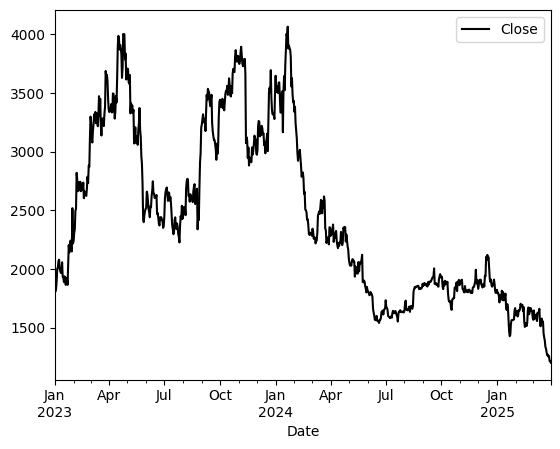

In [4]:
df.plot.line(y="Close",x="Date",color="black")

remove unnecessary


In [5]:
df = df.drop(["Change %","Vol.","High","Low","Open"],axis=1)

In [6]:
df.loc[0:1]

,Date,Close
0,2023-01-01,1815.29
1,2023-01-02,1807.02


Ensure Date: Type[DateTime Object] Instead of [object]

In [7]:
df["Date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 821 entries, 0 to 820
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
821 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 6.5 KB


InCase Date: Type[Str] function which convert date into Datetime Object

In [8]:
import datetime 
df["Date"] = [dt.strftime('%Y-%m-%d') for dt in df["Date"]]   # Conversion Datetime into Str For Education 
df["Date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 821 entries, 0 to 820
Series name: Date
Non-Null Count  Dtype 
--------------  ----- 
821 non-null    object
dtypes: object(1)
memory usage: 6.5+ KB


In [9]:
import datetime
def str_to_datetime(s):
    split = s.split('-')
    year,month,day = int(split[0]),int(split[1]),int(split[2])
    return datetime.datetime(year=year,month=month,day=day)
# print(str_to_datetime("1999-05-25"))


In [10]:
df["Date"]=df["Date"].apply(str_to_datetime)
# df["Date"] = [str_to_datetime(s) for s in df["Date"]]

In [11]:
df["Date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 821 entries, 0 to 820
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
821 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 6.5 KB


making df["Date] Index

In [12]:
df.index = df.pop('Date')


In [13]:
df.head()

,Close
Date,
2023-01-01,1815.29
2023-01-02,1807.02
2023-01-03,1827.84
2023-01-04,1896.69
2023-01-05,2003.67


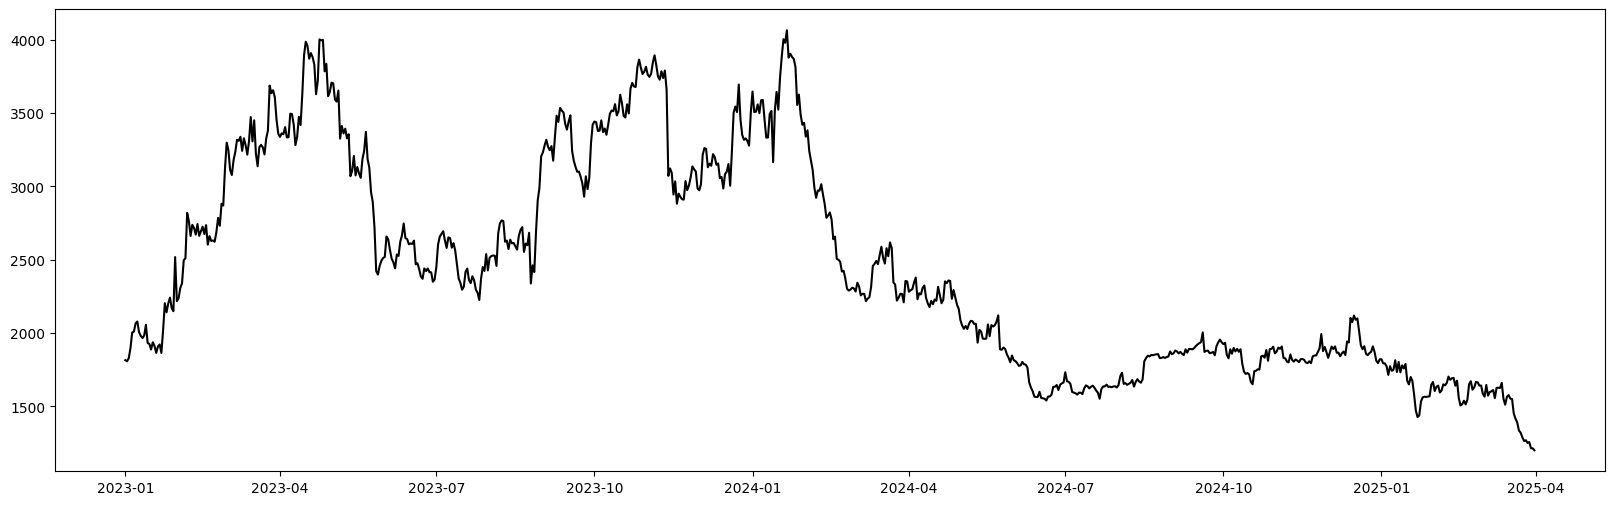

In [14]:
plt.figure(figsize=(20,6))
plt.plot(df.index,df["Close"],'black')
plt.show()